# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [28]:
import pandas as pd
import numpy as np




# Used colab AI for assistance in code



airbnb_df = pd.read_csv('airbnb_hw.csv')

# Numeric variable: Cleaning 'Price' column
airbnb_df['Price'] = airbnb_df['Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
missing_price = airbnb_df['Price'].isna().sum()
print(f"Missing values in Price: {missing_price}")

# Categorical variable: Cleaning 'subject_injury' in Minnesota police dataset

file_path = "/mnt/data/mn_police_use_of_force.csv"
police_df = pd.read_csv('mn_police_use_of_force.csv')
police_df['subject_injury'] = police_df['subject_injury'].str.strip().str.lower()
police_df['subject_injury'] = police_df['subject_injury'].map({'yes': 'Yes', 'no': 'No'})
missing_injury = police_df['subject_injury'].isna().sum()
proportion_missing_injury = missing_injury / len(police_df)
print(f"Proportion of missing subject_injury: {proportion_missing_injury:.2%}")

# Cross-tabulation with force_type
crosstab_result = pd.crosstab(police_df['subject_injury'], police_df['force_type'])
print(crosstab_result)

# Dummy variable: Cleaning 'WhetherDefendantWasReleasedPretrial' in pretrial data

file_path = "/mnt/data/pretrial_data.csv"
pretrial_df = pd.read_csv('pretrial_data.csv')


def clean_release(value):
    if pd.isna(value):
        return np.nan
    value_str = str(value).strip().lower()
    if value_str in ['yes', 'released', 'y']:
        return 1
    elif value_str in ['no', 'not released', 'n']:
        return 0
    return np.nan



# --- Missing Values Not at Random: Cleaning sentence ---
print(pretrial_df['sentence'].value_counts(dropna=False))
print(pretrial_df['sentence_type'].value_counts(dropna=False))
def clean_sentence(imposed_sentence, sentence_type):
    if pd.isna(imposed_sentence):
        if pd.isna(sentence_type) or sentence_type.lower() == 'no conviction':
            return 'No Sentence'
        else:
            return np.nan

pretrial_df['Cleaned_Imposed_Sentence'] = pretrial_df.apply(
    lambda row: clean_sentence(row['sentence'], row['sentence_type']), axis=1)
missing_before_sentence = pretrial_df['sentence'].isna().sum()
missing_after_sentence = pretrial_df['Cleaned_Imposed_Sentence'].isna().sum()
print(f"Missing values before cleaning (Imposed Sentence): {missing_before_sentence}")
print(f"Missing values after cleaning (Imposed Sentence): {missing_after_sentence}")
print(pretrial_df['Cleaned_Imposed_Sentence'].value_counts(dropna=False))


Missing values in Price: 0
Proportion of missing subject_injury: 76.19%
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172  
sentence
0.000000     13732
12.000000     1404
0.985626      1051
6.000000       809
3.000000       787
             ...  
49.971253        1
57.034908        1
79.926078        

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year Range: 0 - 2026

Attacks per year (since 1940):
     Year  counts
0   1940      24
1   1941      27
2   1942      41
3   1943      28
4   1944      31
..   ...     ...
82  2022      98
83  2023     109
84  2024      49
85  2025       6
86  2026       1

[87 rows x 2 columns]

Proportion of male victims: 85.80%

Proportion of unprovoked attacks: 0.00%

Analysis of attack likelihood and fatality (requires further analysis):

Proportion of attacks by white sharks: 12.88%


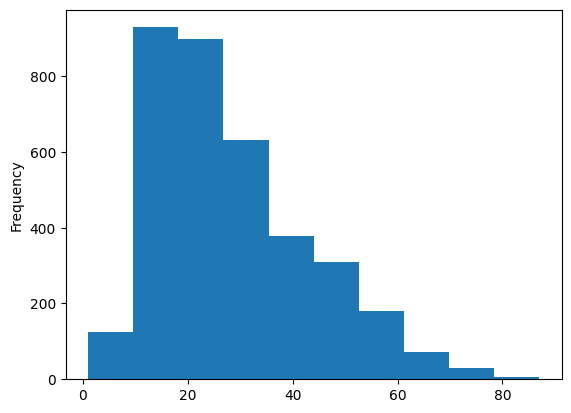

In [34]:
import pandas as pd
import numpy as np

# Done with assistance from Colab AI
# Load the dataset (assuming it's in the same directory as the notebook)
try:
    df = pd.read_excel('GSAF5.xls')
except FileNotFoundError:
    print("Error: 'GSAF5.xls' not found. Please upload the file to your Colab environment.")
    df = None


if df is not None:
    # 2. Drop columns with no data
    df = df.dropna(axis=1, how='all')

    # 3. Clean the year variable
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64') # Use Int64 to handle potential NaN values
    print("Year Range:", df['Year'].min(), "-", df['Year'].max())
    df = df[df['Year'] >= 1940]

    #Attacks over time (you might want to plot this for a better visualization)
    attacks_per_year = df.groupby('Year').size().reset_index(name='counts')
    print("\nAttacks per year (since 1940):\n", attacks_per_year)


    # 4. Clean the Age variable and make a histogram
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Age'].plot(kind='hist')


    # 5. Proportion of male victims
    proportion_male = df['Sex'].value_counts(normalize=True).get('M', 0)
    print(f"\nProportion of male victims: {proportion_male:.2%}")

    # 6. Clean the Type variable
    df['Type'] = df['Type'].str.strip().str.lower()
    def clean_type(x):
        if pd.isna(x):
          return 'Unknown'
        elif 'provoked' in x:
            return 'Provoked'
        elif 'unprovoked' in x:
            return 'Unprovoked'
        else:
            return 'Unknown'
    df['Type'] = df['Type'].apply(clean_type)
    proportion_unprovoked = df['Type'].value_counts(normalize=True).get('Unprovoked', 0)
    print(f"\nProportion of unprovoked attacks: {proportion_unprovoked:.2%}")


    # 7. Clean the Fatal Y/N variable
    df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper()
    def clean_fatal(x):
      if pd.isna(x) :
        return 'Unknown'
      elif x in ('Y', 'N'):
        return x
      else:
        return 'Unknown'
    df['Fatal Y/N'] = df['Fatal Y/N'].apply(clean_fatal)

    # 8. Analysis of attack likelihood and fatality based on gender and provocation
    # (You can use cross-tabulation or other statistical methods here)
    print("\nAnalysis of attack likelihood and fatality (requires further analysis):")

    # 9. Proportion of attacks by white sharks
    proportion_white_shark = df['Species '].str.contains('White', na=False, case=False).mean()
    print(f"\nProportion of attacks by white sharks: {proportion_white_shark:.2%}")


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  This paper is about tidy datasets, and how to tidy data efficiently.
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  It attempts to make it easier to clean data by having set standards, as well as making analysis of tidy data easier.
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  The first sentence means that all tidy datasets are alike, which makes them much easier to work with. All untidy datasets are different, meaning that each time you work with a new one there will be new challenges.
  The second sentence means that identifying observations vs variables tends to be easy, but finding the meaning of these things within the context of the dataset is much harder.
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  He defines values as belonging to either variables or observations. He defines a variable as values that measure the same attribute. He defines observations as values measured across the same unit, like a person for example.
  5. How is "Tidy Data" defined in section 2.3?
  Tidy data happens when each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  The five most common problems are that column headers are values not variable names, multiple variables being stored in the same column, variables being stored in both rows and columns, multiple types of observational units in the same table, and a single observational unit in multiple tables. The dataset is messy because there are three variables, and some of the variables are not represented by one column. Melting is turning columns into rows.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  Table 11 is messy because each observation, or day in this case, does not have its own row.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  If tidy data is only as useful as the tools that work with it, then tidy tools will be heavilt linked to tidy data. Wickham hopes that tidy data will lead to a better solution for data wrangling in the future.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?